# Programming for Data Analysis Project 2019 

<p align="center"> <img width="800" height="600" src="Images/accident1.jpg" alt="Choice Function Description" /> </p>

###  Table of Contents<a id="table"/>

* [Goals and objectives](#goals)
* [Introduction](#intro)
* [Data investigation](#investigation)
* [Dataset review](#dataset)
* [Summary](#summary)
* [References](#references)

## Goals and objectives<a id="goals"/>

* Choose a real-world phenomenon that can be measured and for which could collect at least one-hundred data points across at least four different variables.
* Investigate the types of variables involved, their likely distributions, and their
relationships with each other
* Synthesise/simulate a data set as closely matching their properties as possible.
* Use a Jupyter notebook for research and implement the simulation inside

[**<<<**](#table)

## Introduction<a id="intro"/>

This Jupyter notebook discusses the creation of a dataset showing the road accident across Ireland of various type of severity and time span also factor per fixed number of citizens, vehicles in the distribution of each member state to generate results in line with currently published data sources referenced in the document.

The road safety is common problem and priorites for many countries in the EU and world. There are many factor that influence road accident and is hard to analyse all of them with details. This project will focus on major variables which are published in the statistical reports by state agencies and based on this the dataset will be created.

At the begining is worth to look on real official data about road safety in Ireland and see how these statistics look in respect of other countries of the EU. The chart below is coming from OECD data and shows dead on the roads in 2017 in the EU per million of inhabitants with highlighting Ireland.  

<p align="center"> <img width="800" height="400" src="Images/EU.png" alt="Choice Function Description" /> </p>

It can be seen that Ireland is in the leading part of that chart with resonable small number of fatalities on the roads.
This statistics idealy should be brought death value to zero for safety but in reality any efforts should be carried out to improve road safety.

What are the main factors that cause accidents? According to RSA below infographic gather the most common culprits.

<p align="center"> <img width="800" height="400" src="Images/Main_Questions.png" alt="Choice Function Description" /> </p>

The number of road deaths dropped by 4% last year, the lowest number of fatalities on the roads since records began.
Provisional statistics up to 31 December 2018 show that a total of 149 people lost their lives on Ireland’s roads as a result of 142 fatal crashes.
This compares with 156 deaths as a result of 141 fatal crashes in 2017, making last year the safest year on Ireland’s roads since deaths were first recorded in 1959.[1]




[**<<<**](#table)

## Data investigation<a id="investigation"/>

As mentioned in previous paragraph road accidents by nature have many factors that have to be investigated with connection to each other. For the purpose of this project, there will be limited factors used to create a synthesized dataset as a main goal of this task is to show the process of data creation and simulation of this phenomenon rather than deep analyse of all possible factors etc. 

The dataset will include the following data and parameters:

|Variable|Description|Data Type|Distributions|
|------|---------------|----------------|---------------|
|Loacation|City/Town|Text|Normal|
|Road User|Type of road user|Text|Normal|
|Collision Type|Consequence of an accident|killed/injured|Bernoulli|
|Gender|Gender of road user|male/female|Bernoulli|
|Month|Time in the year|Text|Normal|
|Alcohol Related|Was alcohol involved|yes/no|Bernoulli|


The time period will be one year. All relationship between the variables will be simulated and review during the dataset creation process.

Based on data from Cental Statistical Office [3] the total number of all kind of road accidents in 2012 was above 8000.

<p align="center"> <img width="800" height="400" src="Images/total_accidents.png" alt="Choice Function Description" /> </p>

The created dataset will contain 8000 entries for all accidents. 

In [1]:
# Import all relevant libraries
import numpy as np
import numpy.random as rnd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sets a chart style
sns.set(style="darkgrid", color_codes=True)
# Use magic function to render the figure in a notebook
%matplotlib inline

# Set number of samples based on number of accidents
numsam = 8000

At the begining is necessary to create all possible selections for each variable.
The first is the location. In this case the data from CSO will be used to reflect the entire State. CSO counts number of inhabitants in all major locations like Dublin, Galway, Limerick etc. that include Cities and their suburbans areas and called them i.e. "Dublin and suburbans areas" but for this project this will be simplified and called just cities names that including all suburbans areas i.e. "Dublin". To reduce number of all locations the bigest cities and town in different part of coutry were picked. 

In [2]:
# Create all possible locations
# Read data csv from CSO
population = pd.read_csv("Data/population.csv")
# Name colums
population.columns = ['Place','Inhabitants']
# Create data frame
df = pd.DataFrame(population)
# Picked the bigest cities and town
df = df[0:30]
# Assign location from the data
location = df.Place
# Display number of entries
location

0          Dublin
1            Cork
2        Limerick
3          Galway
4       Waterford
5        Drogheda
6          Swords
7         Dundalk
8            Bray
9           Navan
10       Kilkenny
11          Ennis
12         Carlow
13         Tralee
14      Newbridge
15     Portlaoise
16     Balbriggan
17           Naas
18        Athlone
19      Mullingar
20      Celbridge
21        Wexford
22    Letterkenny
23          Sligo
24     Greystones
25        Clonmel
26       Malahide
27    Carrigaline
28        Leixlip
29      Tullamore
Name: Place, dtype: object

There is 30 location picked from CSO data. 

In further step the four major group of road user will be created.

In [3]:
# Create all road user options
road_user = ['Pedestrians', 'Cyclists', 'Motorbike', 'Car']

The collision type was limited to two option whcih are the most important. It will be check if victim of accident was death or injured. For detailed analyse this option can be investigated further i.e. major, minor injurys, no injurys at all, damage to vehicle or property without any harm issue to the road user etc.

In [4]:
# Create collision types
collision = ['Killed','Injured']

The next factor that will be checked is the gender of road user involved in the accident. It is worth to check how gender impacts the data.

In [5]:
# Create gender options
gender = ['male', 'female']

It is important to model data with consideration of time of the year as the different months have a significant influence on the road conditions.

In [6]:
# Create all monts in the year
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

At the end, the variable that indicates if alcohol was involved as accidents culprit on the roads.

In [7]:
# Create influence of alcohol possibility
alcohol = ['yes', 'no']

### Generating a number of accidents

The starting point in the creation of dataset will be to distribute a number of accidents by locations. Looking at the number of inhabitants in each place it might be a way to try to determine the weight of probability for generating data.

In [8]:
# Display few first rows of dataframe 
df.head()

,Place,Inhabitants
0,Dublin,1173179
1,Cork,208669
2,Limerick,94192
3,Galway,79934
4,Waterford,53504


In [9]:
# Calculate the sum of total inhabitants in selected Places
total = df.Inhabitants.sum()
total

2198054

The total number of people living in all selected locations is **2,198,054**.

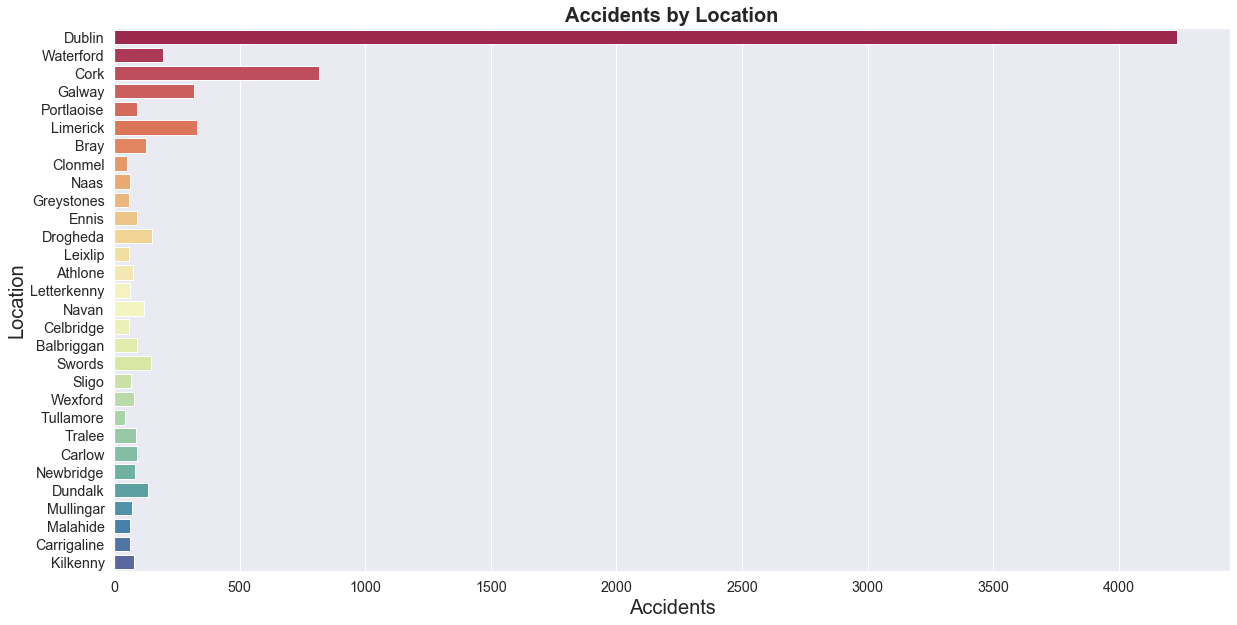

In [25]:
# Determind probability
loc_pr = (df['Inhabitants']/total).tolist()
# Use seeds to keep results the same every time that run and restart cells of notebook   
np.random.seed(1)
# Distribute accidents across location with defined probability 
accidents = pd.DataFrame({'Place': rnd.choice(location, numsam, p=loc_pr)})
# Defines chart size
plt.rcParams['figure.figsize'] = (20,10)
# Define axis font size
sns.set(font_scale=1.3)
# Show results 
sns.countplot(y='Place', data=accidents, palette="Spectral")
# Defines chart lables
plt.title("Accidents by Location", fontweight="bold", fontsize=20)
plt.xlabel('Accidents',fontsize=20)
plt.ylabel('Location',fontsize=20)

plt.show()

The result is not surprising. The Dublin, Cork, Galway and Limerick are leading areas of the road accidents in Ireland, however by looking on the graph above, the Dublin looks too favourable across the whole country.

It is worth to check different approach in this investigation. Reviewing the data about the NDLC centres location it might be a not bad approach to use those places and the total number of driving licences to represent the entire state.
The one point to notice is that checking road users not all of them holding a driving license like pedestrians, car passengers or cyclists but in most cases of incidents on the road the vehicles are involved.

In [33]:
# Create all possible locations based on RSA NDLC data 
licences = pd.read_csv("Data/licences.csv")
# Create data frame
dfl = pd.DataFrame(licences[['County','Total']])
# Assign location from the data
location = dfl.County
# Display number of entries
location

0              CARLOW
1               CAVAN
2               CLARE
3                CORK
4             DONEGAL
5              DUBLIN
6              GALWAY
7               KERRY
8             KILDARE
9            KILKENNY
10              LAOIS
11            LEITRIM
12    LIMERICK COUNTY
13           LONGFORD
14              LOUTH
15               MAYO
16              MEATH
17           MONAGHAN
18             OFFALY
19          ROSCOMMON
20              SLIGO
21          TIPPERARY
22          WATERFORD
23          WESTMEATH
24            WEXFORD
25            WICKLOW
Name: County, dtype: object

There are 26 counties where NDLC has offices. 

In [35]:
# Display few first rows of dataframe 
dfl.head()

,County,Total
0,CARLOW,34473
1,CAVAN,42313
2,CLARE,72626
3,CORK,304499
4,DONEGAL,91760


In [37]:
# Calculate the sum of total DL holders in selected Places
total = dfl.Total.sum()
total

2570871

The total number of driving licence holders in all selected locations is **2,570,871**.

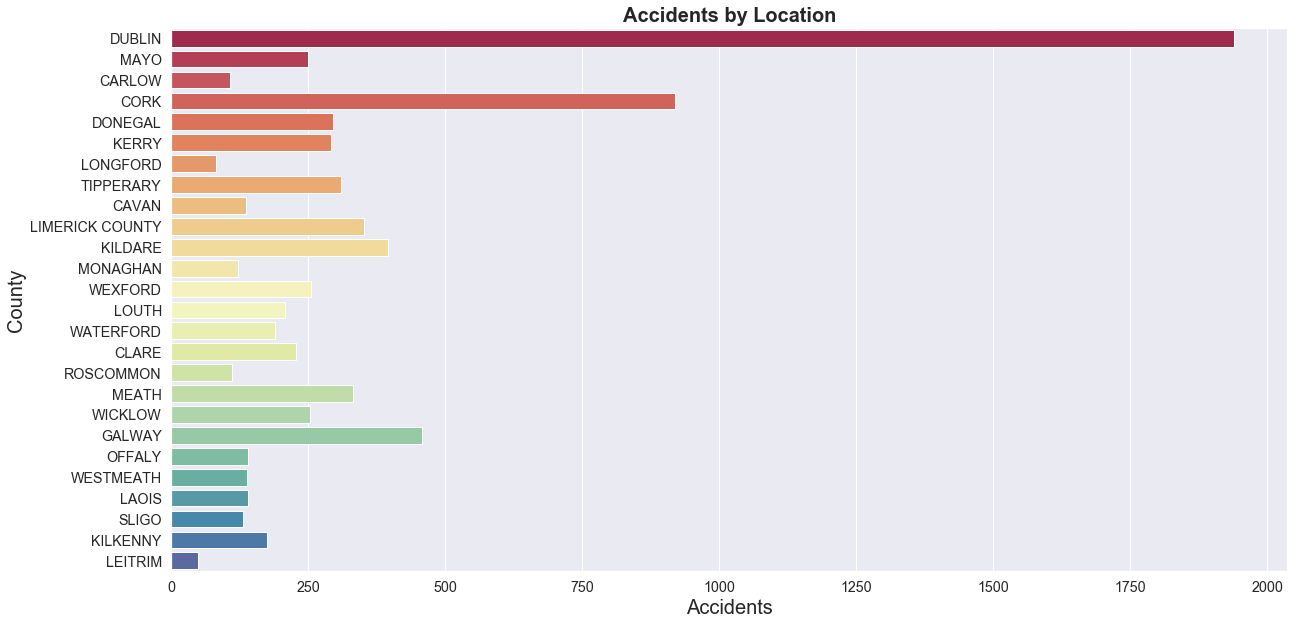

In [39]:
# Determind probability
loc_pr = (dfl['Total']/total).tolist()
# Use seeds to keep results the same every time that run and restart cells of notebook   
np.random.seed(1)
# Distribute accidents across location with defined probability 
accidents = pd.DataFrame({'Place': rnd.choice(location, numsam, p=loc_pr)})
# Defines chart size
plt.rcParams['figure.figsize'] = (20,10)
# Define axis font size
sns.set(font_scale=1.3)
# Show results 
sns.countplot(y='Place', data=accidents, palette="Spectral")
# Defines chart lables
plt.title("Accidents by Location", fontweight="bold", fontsize=20)
plt.xlabel('Accidents',fontsize=20)
plt.ylabel('County',fontsize=20)

plt.show()

This plot looks more realistic with respect to the Dublin ratio of accidents. It also makes more sense to keep this data and discard the very first set as all road statistic in Ireland are reported by RSA and are based on their local offices.   

### Classify Accident Road Users

At this stage, the groups ( Pedestrians, Cyclists, Motorbike, Car) of road user will be considered. Reviewing RSA statistics is clear that car users and pedestrians are the largest groups that need to included in the distribution.  

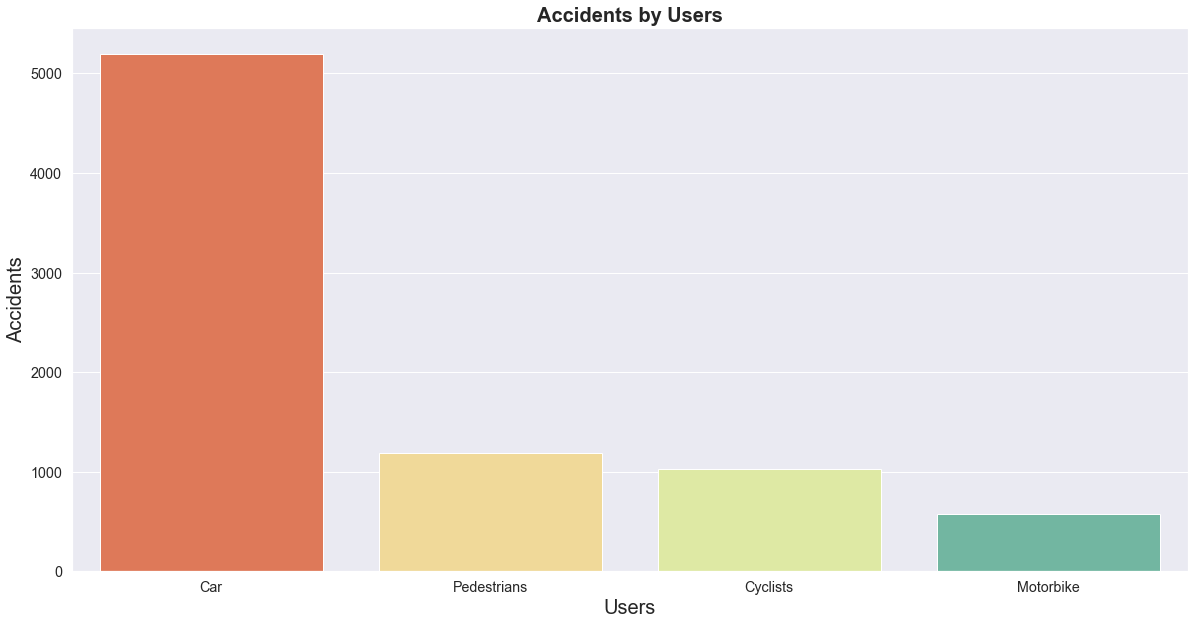

In [11]:
# Distribute accidents across users with defined probability 
accidents['Users'] =rnd.choice(road_user, numsam, p=[0.15, 0.13, 0.07, 0.65] )
# Show results 
sns.countplot(x='Users', data = accidents, palette='Spectral')
# Defines chart lables
plt.title('Accidents by Users', fontweight='bold', fontsize=20)
plt.xlabel('Users',fontsize=20)
plt.ylabel('Accidents',fontsize=20)
plt.show()

### Collision Type

Investigating majority of data from irish roads indicates that in this classification big importance has if result of accident was fatal or not. The next level is checking how severe injury type was result of the crash. This project will only focus on creation of dataset that will indicate two most important types of results which show that person involve in accident was killed or injured.

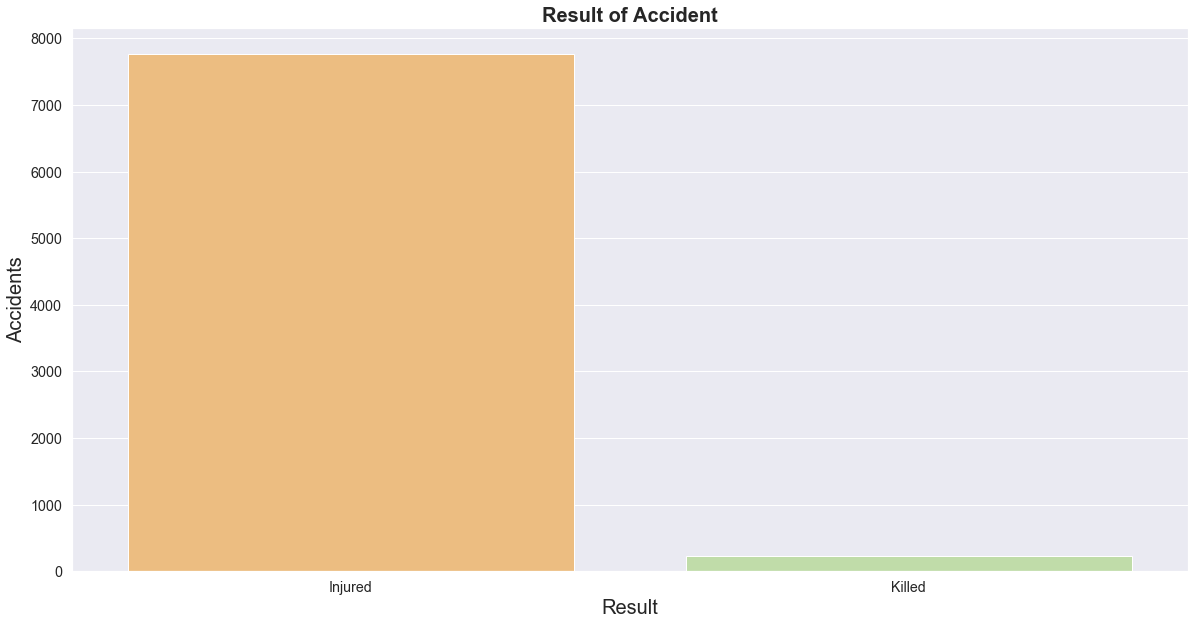

In [12]:
# Distribute accidents across users with defined probability 
accidents['Result'] =rnd.choice(collision, numsam, p=[0.0288, 0.9712,] )
# Show results 
sns.countplot(x='Result', data = accidents, palette='Spectral')
# Defines chart lables
plt.title('Result of Accident', fontweight='bold', fontsize=20)
plt.xlabel('Result',fontsize=20)
plt.ylabel('Accidents',fontsize=20)
plt.show()

The chances of fatal consequences in accident on roads in Ireland are much less possible than probability of being injured. That is why **p** parameter was defined in favor of injuries. 

### Gender

In this section the Gender of Road Users will be added to the dataset.For purpose of this investigation, the "age_gender.csv" file generated from CSO will be used as a start point. 

In [13]:
# Read data csv from CSO
g_dist = pd.read_csv("Data/age_gender.csv")
# Add percentage columns of male/female distribution 
g_dist['Mprc']=g_dist['Male']/g_dist['Total']*100
g_dist['Fprc']=g_dist['Female']/g_dist['Total']*100
# Display data
g_dist

,Age,Male,Female,Total,Mprc,Fprc
0,0-4,169731,161784,331515,51.198588,48.801412
1,05-09,181470,174091,355561,51.037656,48.962344
2,10-14,163378,156098,319476,51.139366,48.860634
3,15-19,154908,147908,302816,51.155817,48.844183
4,20-24,137584,136052,273636,50.279934,49.720066
5,25-29,145222,152213,297435,48.824785,51.175215
6,30-34,173179,188796,361975,47.842807,52.157193
7,35-39,191045,198376,389421,49.058731,50.941269
8,40-44,177482,179978,357460,49.650870,50.349130
9,45-49,162824,163286,326110,49.929165,50.070835


Reviewing above data is worth to calculate the overall male to female percentage ratio for all age groups.

In [14]:
# Calculate average MRat
round(np.average(g_dist['Mprc']))

48.0

The result is showing that male relation to female is **48 per cent** males to female for the entire population in Ireland.

Taking to account that by the nature men are more prone to taking the higher risk the above gender ratio result from CSO data is not the best for probability distribution in accident dataset. The key facts from Brake the road safety charity reveal facts: " Road casualty statistics show a big difference between men and women when it comes to safety on the roads. Men are far more likely to be killed or seriously injured on roads than women, as pedestrians, cyclists and as drivers, and at all ages. This applies not just in the UK, but in the majority of countries worldwide: globally, men account for 73% of all road traffic deaths, with an overall rate almost three times that of women."

Data from Irish RAS 2013 confirm these facts.  

<p align="center"> <img width="600" height="300" src="Images/gender.png" alt="Choice Function Description" /> </p>


Driving licence holders are the majority of road users that is why the next step to investigate better ratio between genders will be use data from RSA. The file licences.csv contains data about "Full Licences Current on 31st December 2016, by County and Gender".  

In [15]:
# Read data csv from RSA
l_dist = pd.read_csv("Data/licences.csv")
# Display data
l_dist.head()

,County,Female,Male,Total
0,CARLOW,15898,18575,34473
1,CAVAN,19018,23295,42313
2,CLARE,34974,37652,72626
3,CORK,141922,162577,304499
4,DONEGAL,42168,49592,91760


In [16]:
# Add ration columns of female/male distribution
l_dist['FRat']=l_dist['Female']/l_dist['Total']
# Display data
l_dist.head()

,County,Female,Male,Total,FRat
0,CARLOW,15898,18575,34473,0.461173
1,CAVAN,19018,23295,42313,0.449460
2,CLARE,34974,37652,72626,0.481563
3,CORK,141922,162577,304499,0.466084
4,DONEGAL,42168,49592,91760,0.459547


In [17]:
# Calculate average FRat in percentage
round(np.average(l_dist['FRat']*100))

46.0

This ratio female to male at 46 per cent looks better for the purpose of use in the gender probability distribution for accident dataset.

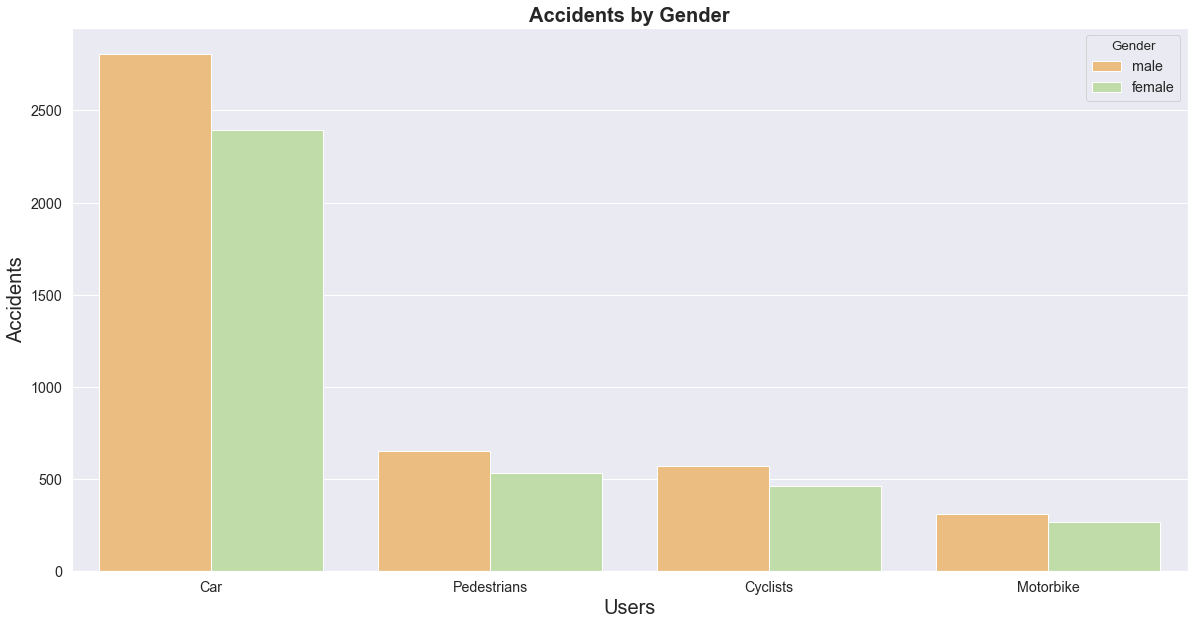

In [18]:
# Create probability for distribution
gdst = [1-np.average(l_dist['FRat']), np.average(l_dist['FRat'])]
# Generate the distribution of gender
accidents['Gender'] =rnd.choice(gender, numsam, p=gdst)
# Show results 
sns.countplot(x='Users', hue='Gender', data = accidents, palette='Spectral')
# Defines chart lables
plt.title('Accidents by Gender', fontweight='bold', fontsize=20)
plt.xlabel('Users',fontsize=20)
plt.ylabel('Accidents',fontsize=20)
plt.show()

### Time of the year

The time of the year might be a significant factor in number of road accidents. As daylight, road and visibility conditions vary in different months of the year this factor will be added to accident dataset.

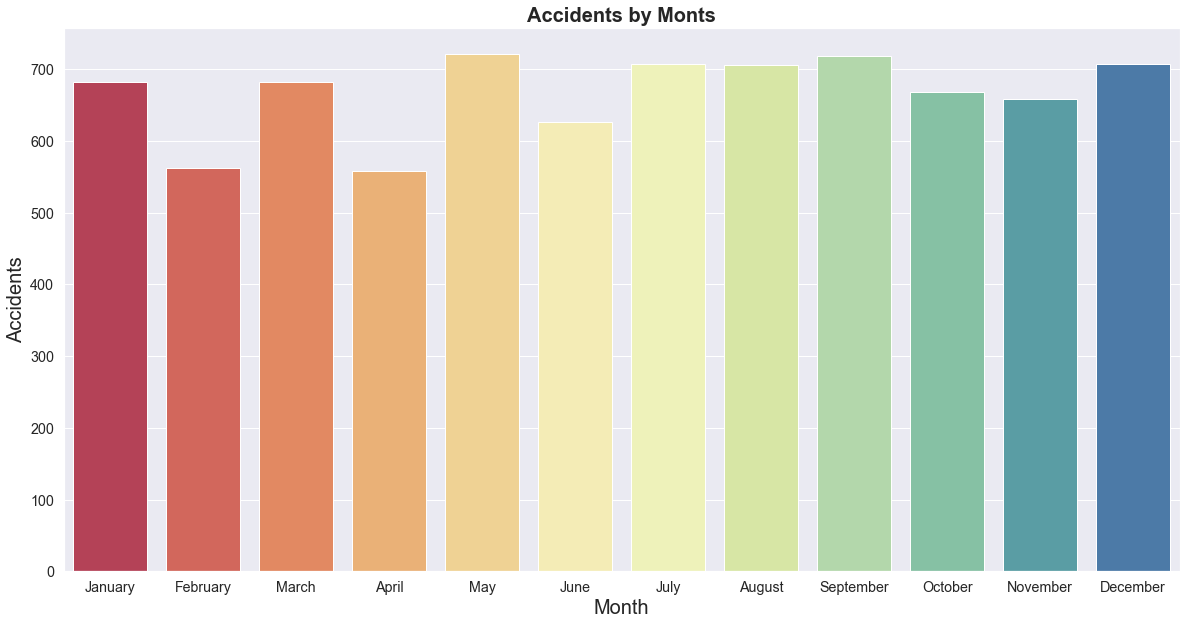

In [19]:
# Distribusion of probabilities of accident by month according to CSO-RSA 2016
mdst=[0.086, 0.072, 0.082, 0.068, 0.088, 0.082, 0.086, 0.086, 0.088, 0.084, 0.085, 0.093]

# Generate the distribution of gender
accidents['Month'] =rnd.choice(month, numsam, p=mdst)

# Show results 
sns.countplot(x='Month', data = accidents, palette='Spectral', order=month)
# Defines chart lables
plt.title('Accidents by Monts', fontweight='bold', fontsize=20)
plt.xlabel('Month',fontsize=20)
plt.ylabel('Accidents',fontsize=20)
plt.show()

### Alcohol as a factor

Alcohol consumption is a significant road safety issue in Ireland and is a factor in 38% of all deaths on Irish roads – with this figure rising to 75% at the off-peak hours of 10pm to 6am.
Even in small amounts, alcohol impairs driving ability and as blood alcohol concentration (BAC) increases and the functioning of vital processes for safe road use, such as vision and motor skills, becomes increasingly impaired. In short, any amount of alcohol increases the risk of involvement in a road traffic collision.**[7]**

Considering that the legal alcohol limit for drivers in Ireland was significantly reduced in recent years is a good assumption that liquor drinks will have less impact on accidents. 
In this case, it is not bad idea to set the probability of alcohol influence on accident number in the synthesize dataset in the range between 25-38%. 

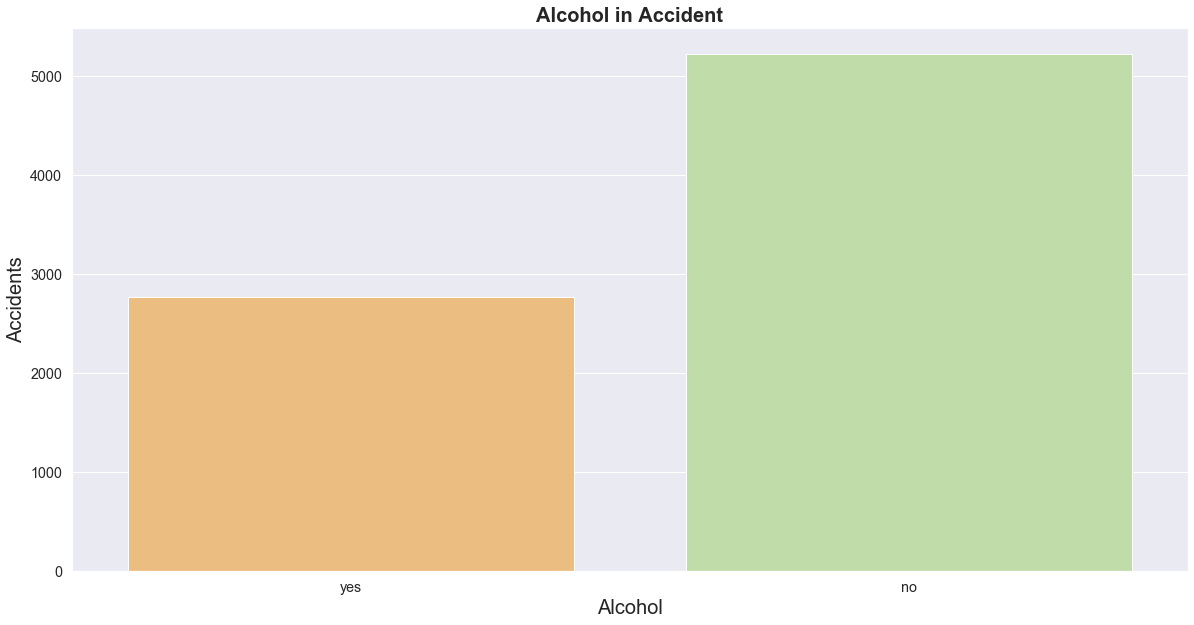

In [20]:
# Generate probabilities weights of accident caused by alcohol
a = rnd.uniform(0.25,0.38)
b = 1 - a
adst = [a,b]
# Generate the distribution of alcohol
accidents['Alcohol'] =rnd.choice(alcohol, numsam, p=adst)

# Show results 
sns.countplot(x='Alcohol', data = accidents, palette='Spectral', order = ['yes','no'])
# Defines chart lables
plt.title('Alcohol in Accident', fontweight='bold', fontsize=20)
plt.xlabel('Alcohol',fontsize=20)
plt.ylabel('Accidents',fontsize=20)
plt.show()

It was a last factor that was considered in the process of modelling and synthetisation the dataset.

### Creating a final dataset and exporting to file

In [21]:
# Show complete accidents dataset 
accidents.head(20)

,Place,Users,Result,Gender,Month,Alcohol
0,Dublin,Car,Injured,male,March,no
1,Dublin,Pedestrians,Injured,male,January,yes
2,Drogheda,Car,Injured,male,November,yes
3,Limerick,Cyclists,Injured,male,February,no
4,Galway,Pedestrians,Injured,female,June,yes
5,Carlow,Motorbike,Injured,male,April,no
6,Naas,Pedestrians,Injured,female,June,no
7,Dublin,Pedestrians,Injured,female,April,no
8,Naas,Pedestrians,Injured,female,December,no
9,Dublin,Pedestrians,Injured,female,October,no


The columns can be sorted to put some of variables in different orders for better look.

In [22]:
accidents = accidents[['Place','Month','Users','Gender','Alcohol','Result']]
accidents.head(20)

,Place,Month,Users,Gender,Alcohol,Result
0,Dublin,March,Car,male,no,Injured
1,Dublin,January,Pedestrians,male,yes,Injured
2,Drogheda,November,Car,male,yes,Injured
3,Limerick,February,Cyclists,male,no,Injured
4,Galway,June,Pedestrians,female,yes,Injured
5,Carlow,April,Motorbike,male,no,Injured
6,Naas,June,Pedestrians,female,no,Injured
7,Dublin,April,Pedestrians,female,no,Injured
8,Naas,December,Pedestrians,female,no,Injured
9,Dublin,October,Pedestrians,female,no,Injured


The final step in this process will be saving the accident dataset in a convenient format and export it to the Data folder(**accidents_projectPDA.csv**).  

In [23]:
# Save the dataset to a csv file
accidents.to_csv('data/accidents_projectPDA.csv',index=False) 

[**<<<**](#table)

## Dataset review<a id="dataset"/>

[**<<<**](#table)

## Summary<a id="summary"/>

[**<<<**](#table)

## References<a id="references"/>

### Information

1. [OECD Data - Road accidents](https://data.oecd.org/transport/road-accidents.htm)
1. [thejournal.ie - 2018 accidents summary](https://www.thejournal.ie/2018-saw-the-lowest-number-of-deaths-on-irish-roads-since-records-began-in-1959-4419050-Jan2019/)
1. [Central Statistics Office - Traffic Collisions and Casualties by County, Statistical Indicator and
Year ](https://statbank.cso.ie/px/pxeirestat/Statire/Graphics/MakeGraph.asp?menu=y&pxfile=2019121122103214424086ROA20.px&gr_type=1&PLanguage=0)
1. [Sex Differences in Everyday Risk-Taking Behavior in Humans](https://journals.sagepub.com/doi/pdf/10.1177/147470490800600104)
1. [Brake the road safety charity - Driver gender facts](https://www.brake.org.uk/facts-resources/1593-driver-gender)
1. [Central Statistics Office -  Road Fatalities by Month of Fatality and Year](https://statbank.cso.ie/px/pxeirestat/Statire/SelectVarVal/Define.asp?maintable=ROA11&PLanguage=0)
1. [Alcohol Ireland - Alcohol and driving](https://alcoholireland.ie/facts/alcohol-and-driving/)
1. []()
1. []()
1. []()
1. []()
1. []()

### Data

1. []()
1. []()
1. []()
1. [NDLS - Where are the NDLS centres?](https://www.ndls.ie/ndls-centre-locations.html#carlow)[viewed 1st Dec 2019]

### Images

1. []()
1. []()
1. []()
1. []()

[**<<<**](#table)